In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import pickle

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive', readonly=True)

In [ ]:
url = "https://ddc-datascience.s3.amazonaws.com/boston.csv"
boston = pd.read_csv( url, index_col = 0 )


In [ ]:
boston.head()

,per_cap_crime,res_zoning_prop,business_prop,river_front,nitric_oxide_conc,num_rooms,units_before_1940,distance_to_employment,distance_to_hwy,prop_tax,pupil_teacher_ratio,perc_lower_status,med_home_value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [ ]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
Index: 490 entries, 0 to 505
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   per_cap_crime           490 non-null    float64
 1   res_zoning_prop         490 non-null    float64
 2   business_prop           490 non-null    float64
 3   river_front             490 non-null    float64
 4   nitric_oxide_conc       490 non-null    float64
 5   num_rooms               490 non-null    float64
 6   units_before_1940       490 non-null    float64
 7   distance_to_employment  490 non-null    float64
 8   distance_to_hwy         490 non-null    float64
 9   prop_tax                490 non-null    float64
 10  pupil_teacher_ratio     490 non-null    float64
 11  perc_lower_status       490 non-null    float64
 12  med_home_value          490 non-null    float64
dtypes: float64(13)
memory usage: 53.6 KB


## Decision Tree Regression

In [ ]:
X = boston.drop('med_home_value', axis = 1)
y = boston['med_home_value']

In [ ]:
numLoops = 500

mean_error = np.zeros(numLoops)

# np.random.seed(42)
for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  model = DecisionTreeRegressor(max_depth=5, random_state=0)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  mean_error[idx] = mean_squared_error(y_test, y_pred)

print(f'RMSE: {np.sqrt(mean_error).mean()*1000}')
print(f'RMSE_std: {np.sqrt(mean_error).std()*1000}')


RMSE: 3775.076604645068
RMSE_std: 430.31378634249126


#Random Forest

In [ ]:
# two parameters - n_estimators (number of trees), max_depth (number of splits)
numLoops = 500

mean_error = np.zeros(numLoops)

# np.random.seed(42)
for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2 )
  model = RandomForestRegressor( n_estimators = 10 ) #n_estimators is number of trees in forest. Note: you can also choose max_depth for RFs
  model.fit( X_train, y_train )
  y_pred = model.predict( X_test )
  mean_error[idx] = mean_squared_error( y_test, y_pred )

print(f'RMSE: {np.sqrt(mean_error).mean()*1000}')
print(f'RMSE_std: {np.sqrt(mean_error).std()*1000}')
np.sqrt(mean_error)[:50]


RMSE: 3067.420945318843
RMSE_std: 372.5495876251432


array([2.82061127, 2.66642599, 2.81893   , 3.00625929, 2.94508359,
       2.67048455, 3.15448013, 2.51813504, 2.95929252, 2.29718061,
       3.96718195, 2.76274302, 2.83674774, 2.77916207, 3.74723844,
       3.20255399, 3.35469075, 3.17617068, 3.01878861, 2.76949399,
       3.49913677, 3.08958025, 2.66193404, 2.67667609, 3.2955104 ,
       3.26273424, 3.37533808, 2.59611307, 3.42833972, 2.95289585,
       2.54586459, 2.84271751, 2.99284777, 2.63449023, 3.1699765 ,
       2.81139318, 2.60474959, 3.26014836, 3.208001  , 2.6828716 ,
       3.22251011, 2.73808905, 2.95669924, 2.795373  , 2.63285482,
       3.25490995, 2.6353728 , 3.03553596, 3.07570334, 2.9969905 ])

## How do you choose number of trees?

In [ ]:
num_trees = range(10,60,10)
cv_loops = 100
rmse_results = np.zeros(len(num_trees))
std_results = np.zeros(len(num_trees))

for n, trees in enumerate(num_trees):
  rmse_cv = np.zeros(cv_loops)
  np.random.seed(42)
  for i in range(cv_loops):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
    rfModel = RandomForestRegressor( n_estimators=trees )
    rfModel.fit(X_train, y_train)
    y_pred_rf = rfModel.predict(X_test)
    rmse_cv[i] = np.sqrt(mean_squared_error(y_test, y_pred_rf))

  print(trees,' trees finished.')
  rmse_results[n] = rmse_cv.mean()
  std_results[n] = rmse_cv.std()


10  trees finished.
20  trees finished.
30  trees finished.
40  trees finished.
50  trees finished.


In [ ]:
pickle.dump(rfModel, open('rfModel.p','wb'))


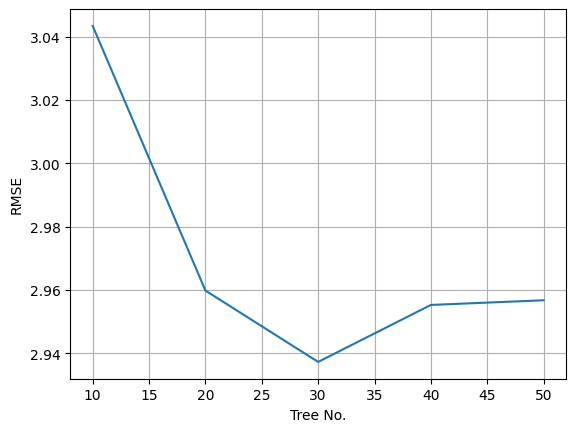

In [ ]:
plt.plot(num_trees, rmse_results)
plt.xlabel('Tree No.')
plt.ylabel('RMSE')
plt.grid()

In [ ]:
pd.DataFrame( zip( rmse_results, std_results, ) )

,0,1
0,3.043357,0.379701
1,2.959792,0.338438
2,2.937264,0.378118
3,2.955255,0.379169
4,2.956729,0.378334


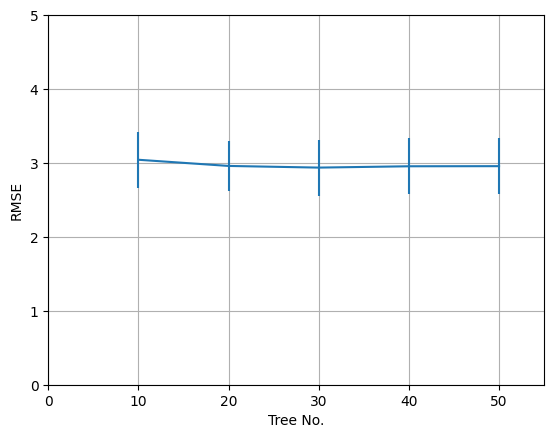

In [ ]:
# plt.errorbar(num_trees, rmse_results, yerr=(std_results*2,std_results*2))
plt.errorbar(num_trees, rmse_results, yerr=std_results)
plt.xlabel('Tree No.')
plt.ylabel('RMSE')
plt.ylim(0,5)
plt.xlim(0,55)
plt.grid()

In [ ]:
print(f'RMSE with 30 trees: {rmse_results[2]*1000}')

RMSE with 30 trees: 2937.2639745639904


In [ ]:
import graphviz
from IPython.display import display
from sklearn import tree

In [ ]:
len(rfModel.estimators_)

50

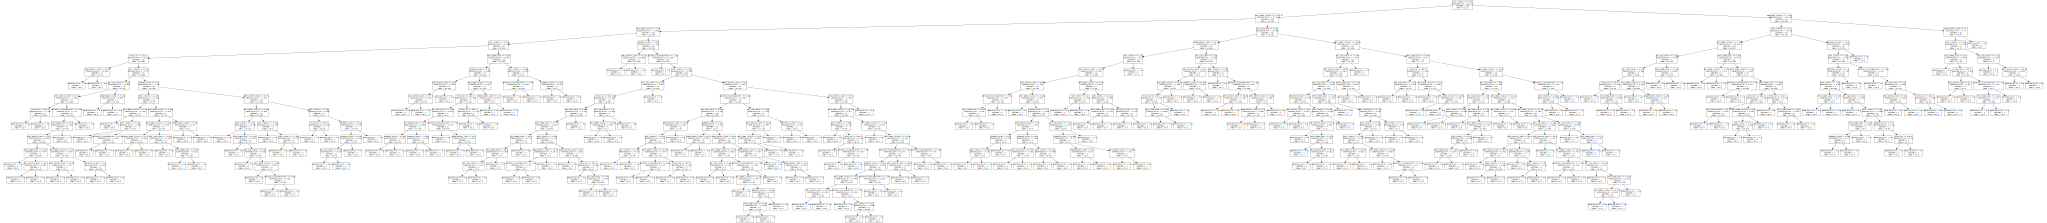

In [ ]:
# Display one tree from the random forest
display(
  graphviz.Source(
    tree.export_graphviz(
      rfModel.estimators_[0],
      feature_names = X.columns,
    )
  )
)

## Find Important Predictors

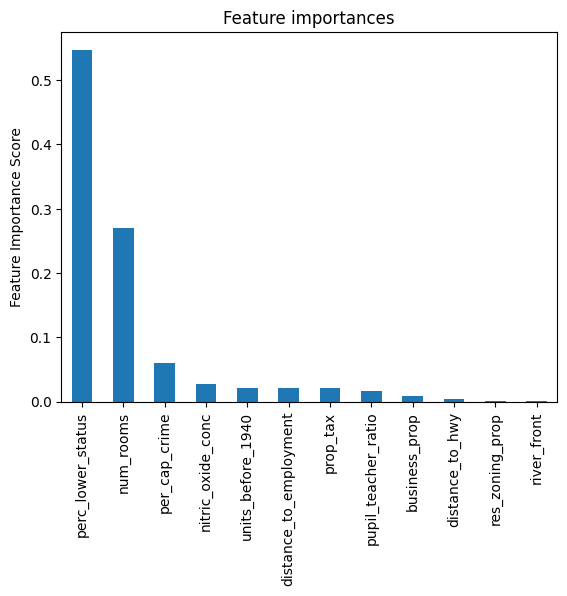

In [ ]:
importances = rfModel.feature_importances_
forest_importances = pd.Series( importances, index = X.columns )

plt.figure()
# forest_importances.plot.bar()
forest_importances.sort_values( ascending = False ).plot.bar()
plt.title("Feature importances")
plt.ylabel('Feature Importance Score') ;

In [ ]:
( forest_importances.sort_values( ascending = False ) * 100 ).cumsum()

perc_lower_status          54.743856
num_rooms                  81.703435
per_cap_crime              87.682636
nitric_oxide_conc          90.428630
units_before_1940          92.609913
distance_to_employment     94.733091
prop_tax                   96.795803
pupil_teacher_ratio        98.383896
business_prop              99.317824
distance_to_hwy            99.761694
res_zoning_prop            99.906263
river_front               100.000000
dtype: float64